### 1. **Instalación de Bibliotecas Necesarias**
Primero, asegurémonos de tener instaladas las bibliotecas necesarias. Usa los siguientes comandos para instalar las librerías si aún no las tienes:

```bash
pip install  graphviz seaborn
```

### 2. **Importar Librerías**
A continuación, importamos las bibliotecas necesarias:



In [ ]:
!pip install  graphviz seaborn

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



### 3. **Cargar y Explorar el Dataset**
Usaremos el conjunto de datos **Iris**, un dataset clásico para la clasificación.

```python

```

In [14]:
# Cargar el dataset Iris desde scikit-learn
from sklearn.datasets import load_iris

# Cargar los datos
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Mostrar las primeras filas del dataset
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


### 4. **Visualización Exploratoria de los Datos (EDA)**

#### Visualización de las relaciones entre características
Usaremos gráficos de dispersión y gráficos de pares para visualizar las relaciones entre las características.

```python

```


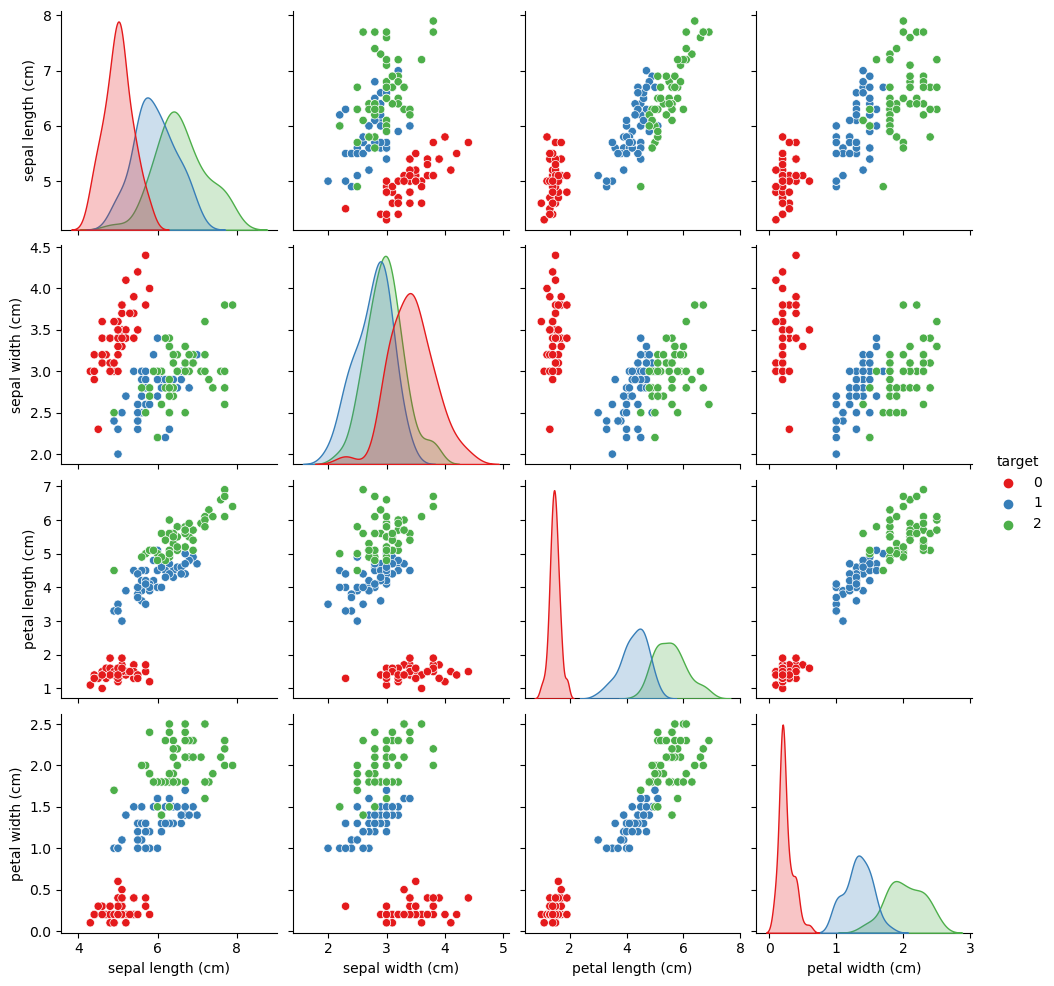

In [15]:
# Gráfico de pares para ver las relaciones entre características
sns.pairplot(df, hue="target", palette="Set1")
plt.show()

#### Distribuciones de las características
También podemos visualizar la distribución de cada característica en el dataset.

```python

```

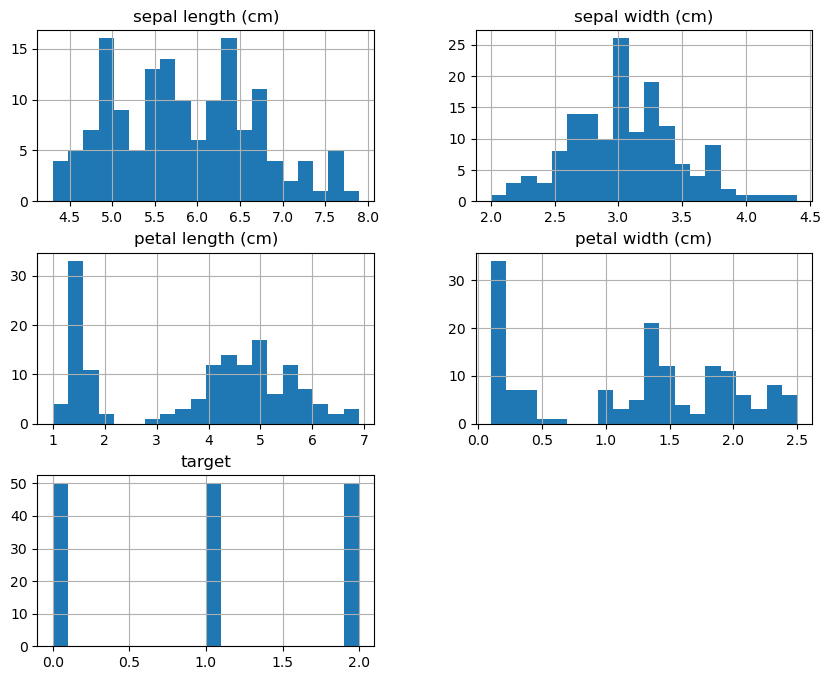

In [6]:
# Histograma para visualizar la distribución de las características
df.hist(figsize=(10, 8), bins=20)
plt.show()


### 5. **Preparación de los Datos**

Dividimos los datos en un conjunto de entrenamiento y otro de prueba. También separamos las características de la variable objetivo.


In [16]:
# Definir características (X) y variable objetivo (y)
X = df.drop('target', axis=1)
y = df['target']

# Dividir los datos en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 6. **Entrenamiento del Árbol de Decisión**

Creamos y entrenamos un árbol de decisión usando **scikit-learn**.

```python

```

In [17]:
# Crear el modelo de árbol de decisión
clf = DecisionTreeClassifier(random_state=42)
# Entrenar el modelo con los datos de entrenamiento
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### 7. **Visualización del Árbol de Decisión**

Podemos visualizar el árbol de decisión utilizando la función `plot_tree`.

```python

```

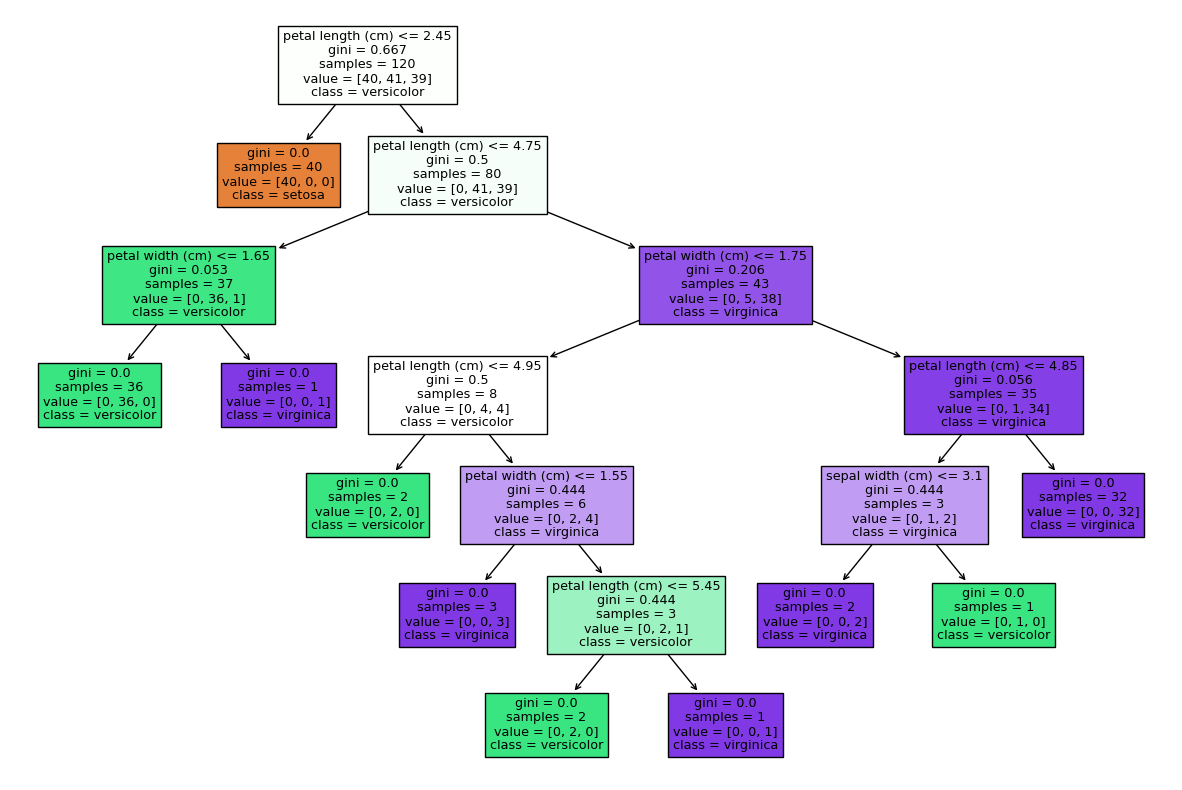

In [18]:
# Visualizar el árbol de decisión
plt.figure(figsize=(15,10))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

### 8. **Evaluación del Modelo**

Es importante evaluar el rendimiento del modelo en los datos de prueba. Usaremos métricas como la precisión y la matriz de confusión.

Precisión del modelo: 1.00


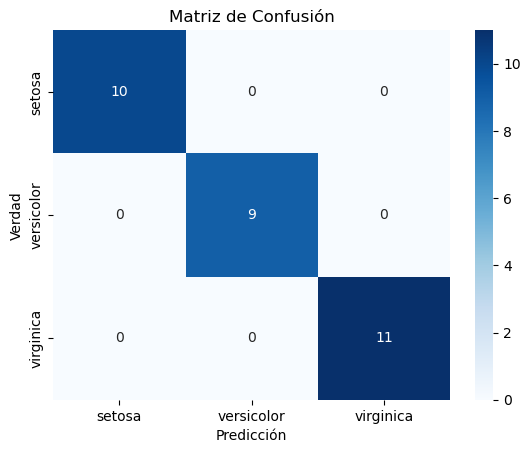

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [19]:
y_pred = clf.predict(X_test)

# Calcular precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

# Mostrar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicción')
plt.ylabel('Verdad')
plt.title('Matriz de Confusión')
plt.show()

# Reporte de clasificación
print(classification_report(y_test, y_pred, target_names=iris.target_names))


### 9. **Optimización del Árbol de Decisión**

El siguiente paso es mejorar el modelo ajustando parámetros como la profundidad máxima del árbol.


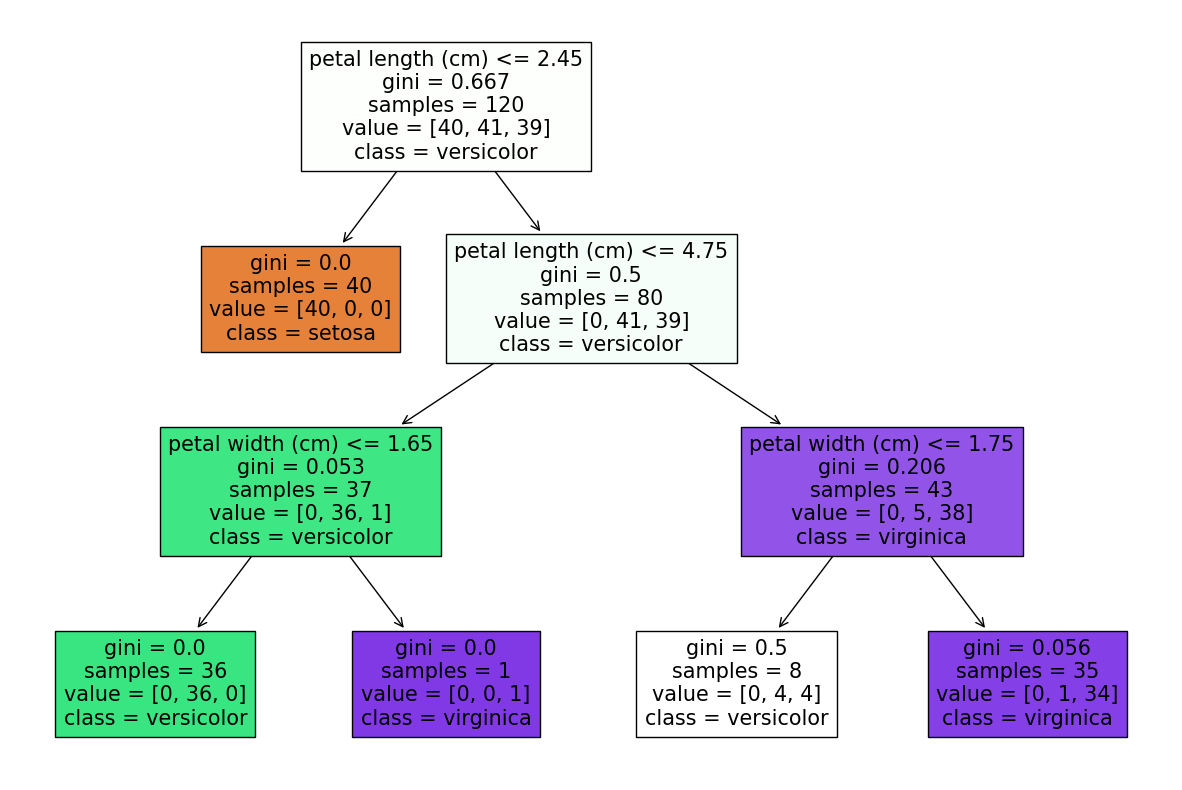

Precisión del modelo optimizado: 1.00


In [12]:
# Crear un nuevo modelo con profundidad máxima limitada
clf_opt = DecisionTreeClassifier(max_depth=3, random_state=42)
# Entrenar el modelo optimizado
clf_opt.fit(X_train, y_train)
# Visualizar el árbol optimizado
plt.figure(figsize=(15,10))
plot_tree(clf_opt, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

# Evaluar el modelo optimizado
y_pred_opt = clf_opt.predict(X_test)
accuracy_opt = accuracy_score(y_test, y_pred_opt)
print(f'Precisión del modelo optimizado: {accuracy_opt:.2f}')

# Prunning


## pre-prunning

In [21]:
# Importar librerías necesarias
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Cargar el dataset Iris
iris = load_iris()
X, y = iris.data, iris.target

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Función para entrenar un árbol de decisión y evaluar el rendimiento
def train_evaluate_tree(max_depth, min_samples_split, min_samples_leaf):
    # Entrenar el modelo
    clf = DecisionTreeClassifier(max_depth=max_depth, 
                                 min_samples_split=min_samples_split, 
                                 min_samples_leaf=min_samples_leaf, 
                                 random_state=42)
    clf.fit(X_train, y_train)

    # Hacer predicciones
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    # Calcular exactitud
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    return train_acc, test_acc


max_depth=None, min_samples_split=2, min_samples_leaf=1 -> Train Acc: 1.00, Test Acc: 1.00
max_depth=5, min_samples_split=2, min_samples_leaf=1 -> Train Acc: 0.99, Test Acc: 1.00
max_depth=3, min_samples_split=10, min_samples_leaf=5 -> Train Acc: 0.94, Test Acc: 1.00


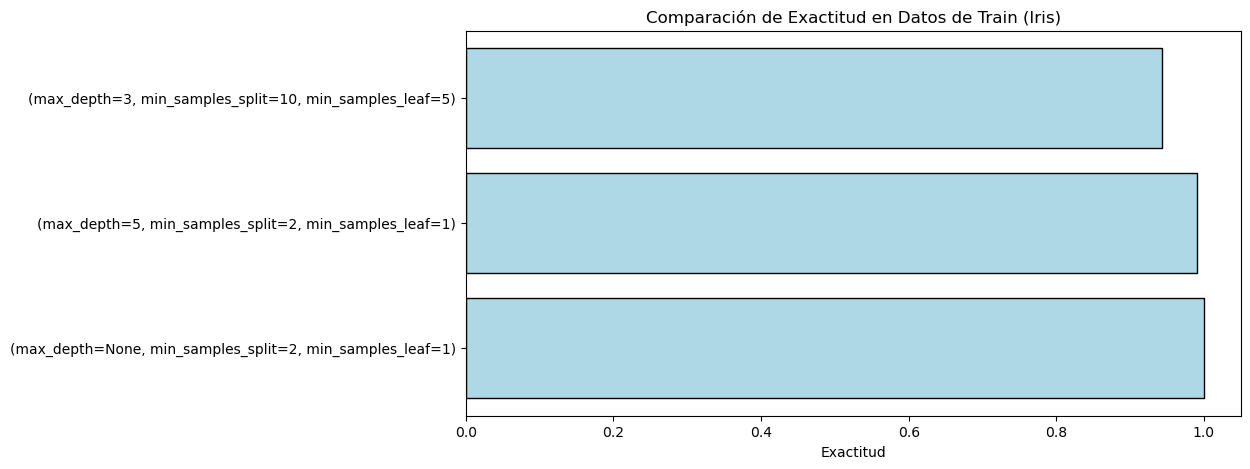

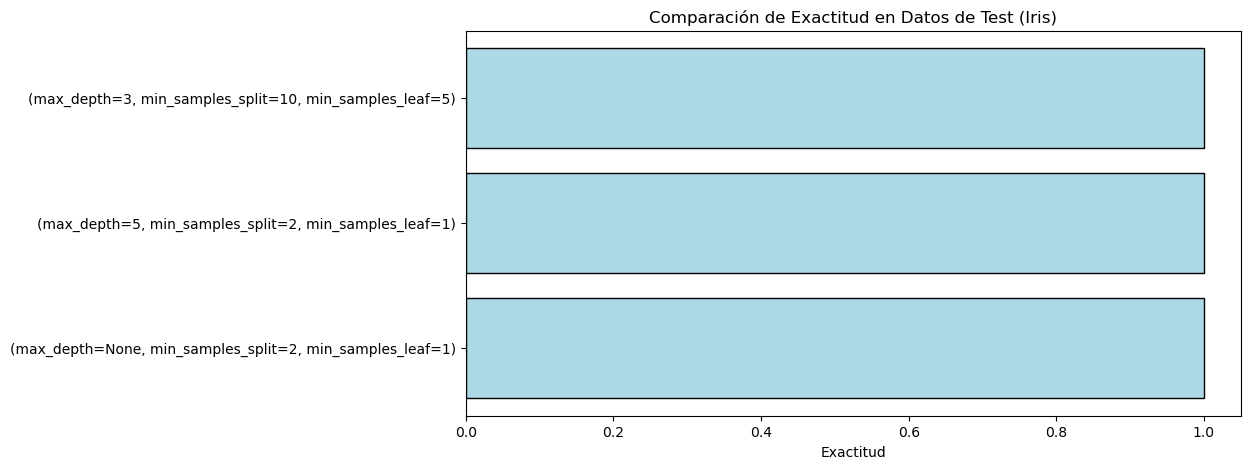

In [24]:

# Entrenar con diferentes configuraciones de hiperparámetros
params = [(None, 2, 1), (5, 2, 1), (3, 10, 5)]
train_accs, test_accs = [], []

for max_depth, min_samples_split, min_samples_leaf in params:
    train_acc, test_acc = train_evaluate_tree(max_depth, min_samples_split, min_samples_leaf)
    train_accs.append(train_acc)
    test_accs.append(test_acc)
    print(f"max_depth={max_depth}, min_samples_split={min_samples_split}, min_samples_leaf={min_samples_leaf} -> Train Acc: {train_acc:.2f}, Test Acc: {test_acc:.2f}")

# Graficar los resultados
labels = ['(max_depth=None, min_samples_split=2, min_samples_leaf=1)', 
          '(max_depth=5, min_samples_split=2, min_samples_leaf=1)', 
          '(max_depth=3, min_samples_split=10, min_samples_leaf=5)']

plt.figure(figsize=(10,5))
plt.barh(labels, train_accs, color='lightblue', edgecolor='black')
plt.title('Comparación de Exactitud en Datos de Train (Iris)')
plt.xlabel('Exactitud')
plt.show()

plt.figure(figsize=(10,5))
plt.barh(labels, test_accs, color='lightblue', edgecolor='black')
plt.title('Comparación de Exactitud en Datos de Test (Iris)')
plt.xlabel('Exactitud')
plt.show()



#### Interpretación:
- **Configuración sin restricciones (max_depth=None, min_samples_split=2, min_samples_leaf=1)**: El árbol crecerá hasta clasificar perfectamente todos los ejemplos, lo cual puede llevar a **overfitting**. El rendimiento en el conjunto de entrenamiento será muy alto, pero puede ser peor en el conjunto de prueba.
  
- **Configuración con max_depth=5, min_samples_split=2, min_samples_leaf=1**: Limitar la profundidad del árbol a 5 reduce el riesgo de overfitting, mejorando la generalización en el conjunto de prueba.

- **Configuración conservadora (max_depth=3, min_samples_split=10, min_samples_leaf=5)**: Hiperparámetros muy conservadores pueden llevar a **underfitting**, lo que resulta en un rendimiento pobre en ambos conjuntos (entrenamiento y prueba).


### Ejercicio para estudiantes

**Ejercicio:**
1. Utiliza el dataset **Diabetes** para entrenar un árbol de decisión.
2. Experimenta con diferentes valores de `max_depth`, `min_samples_split` y `min_samples_leaf`.
3. Observa cómo cambian las métricas (accuracy para clasificación, MSE para regresión) y discute cómo esos valores afectan el **overfitting** y el **underfitting**.
4. Explica cómo elegir un buen conjunto de hiperparámetros para un problema específico.

In [25]:
from sklearn.datasets import load_diabetes
import numpy as np

# Cargar el dataset Diabetes
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Post-prunning

El **pruning (poda)** es una técnica usada en árboles de decisión para reducir su complejidad y evitar el **overfitting**. En **scikit-learn**, puedes aplicar la poda mediante el parámetro **`ccp_alpha`** (cost complexity pruning), que controla el nivel de poda del árbol. Un valor de `ccp_alpha` más alto conduce a una mayor poda, lo que reduce el tamaño del árbol.

In [31]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Cargar el dataset Iris
iris = load_iris()
X, y = iris.data, iris.target

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar el árbol de decisión sin poda (ccp_alpha=0)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [32]:
# Evaluar el rendimiento antes de la poda
train_acc = accuracy_score(y_train, clf.predict(X_train))
test_acc = accuracy_score(y_test, clf.predict(X_test))
print(f"Accuracy sin poda -> Train: {train_acc:.2f}, Test: {test_acc:.2f}")

Accuracy sin poda -> Train: 1.00, Test: 1.00


In [33]:
# Obtener valores de ccp_alpha para aplicar pruning
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas  # valores de poda
impurities = path.impurities  # impurezas del nodo asociadas con cada valor de alpha

# Entrenar múltiples árboles podados
clfs = []
train_accs = []
test_accs = []

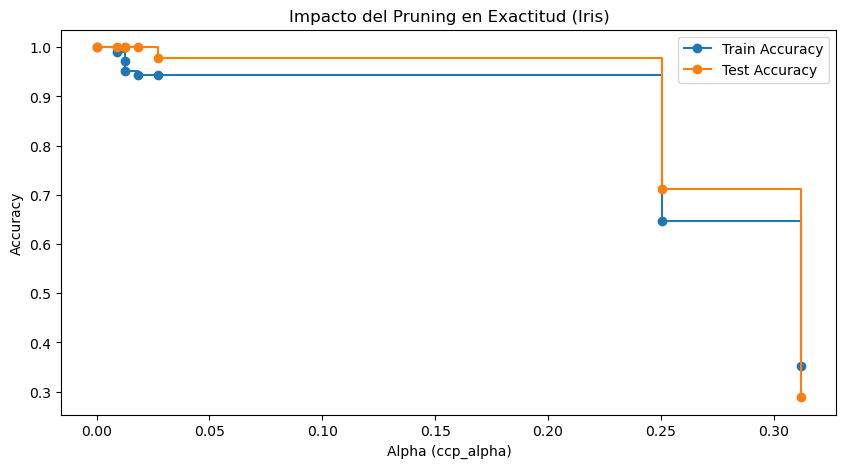

In [34]:
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))
    
    clfs.append(clf)
    train_accs.append(train_acc)
    test_accs.append(test_acc)

# Graficar el impacto de la poda en la exactitud
plt.figure(figsize=(10,5))
plt.plot(ccp_alphas, train_accs, marker='o', label='Train Accuracy', drawstyle="steps-post")
plt.plot(ccp_alphas, test_accs, marker='o', label='Test Accuracy', drawstyle="steps-post")
plt.xlabel("Alpha (ccp_alpha)")
plt.ylabel("Accuracy")
plt.title("Impacto del Pruning en Exactitud (Iris)")
plt.legend()
plt.show()

- **`cost_complexity_pruning_path`**: Obtiene los valores de `ccp_alpha` que se pueden usar para la poda.
- **`ccp_alpha`**: Controla el nivel de poda. Un valor de `ccp_alpha` más alto implica más poda y un árbol más simple.
- Al aumentar el valor de `ccp_alpha`, se reduce la complejidad del árbol, lo que puede evitar el **overfitting**, pero si se abusa, puede producir **underfitting**.

### Ejercicio para estudiantes

**Objetivo**: Aplicar la poda en árboles de decisión para ajustar el rendimiento del modelo.

**Instrucciones**:
1. Utiliza el conjunto de datos  **Diabetes** .
2. Entrena un árbol de decisión sin poda (`ccp_alpha=0`).
3. Usa `cost_complexity_pruning_path` para obtener los valores de `ccp_alpha`.
4. Entrena varios árboles podados con diferentes valores de `ccp_alpha`.
5. Grafica el impacto de la poda en el rendimiento del modelo en los conjuntos de entrenamiento y prueba.
6. Analiza cómo varía el rendimiento al ajustar los niveles de poda, discutiendo cómo evitar tanto el **overfitting** como el **underfitting**.

In [35]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
